# «Методы восстановления регрессии»

In [1]:
import matplotlib.pyplot as plt
import common as com
import numpy as np
from general import sse
import math
from sklearn import datasets
import general as gen
from prepare_data import FormData
from RegressionRecovery.linear_regression import *
from RegressionRecovery.nadaraya_watson import *
from RegressionRecovery.ridge_regressor import *
from RegressionRecovery.ridge_regressor_2 import *
from RegressionRecovery.lowess import *
from RegressionRecovery.pca import *
from RegressionRecovery.lasso import *

In [2]:
# generate regression dataset
#--------
# X,Y = datasets.make_regression(n_samples=100, n_features=1, noise=14.9)
#--------
# diabetes = datasets.load_diabetes()
# diabetes_X = diabetes.data[:, np.newaxis, 0]
#--------
# boston_data = datasets.load_boston()
# X = boston_data.data[1:5,0:1]
# Y = boston_data.target
#--------
# def plant_data():
#     import csv
# 
#     X = []
#     y = []
#     with open('datasets/power_plant_data.csv', newline='') as csvfile:
#         reader = csv.reader(csvfile, delimiter=';', quotechar='|')
#         for row in reader:
#             if reader.line_num == 1: continue # skip header
#             X.append([float(row[i].replace(',', '.')) for i in range(4)])
#             y.append(float(row[4].replace(',', '.')))
#     X = np.array(X)
#     y = np.array(y)
#     return X, y
# 
# X, Y = plant_data()
# 
# X = X[...,[0]]
# 
# take = 100
# X = X[:take,...]
# Y = Y[:take,...]
# sorted = np.argsort(X[...,0])
# X = X[sorted,...]
# Y = Y[sorted,...]
#--------
# size = 130
# X = np.sort(np.random.uniform(low=1, high=10, size=size))
# Y = gen.genY(X, noise=0.3, n_outliers=int(size * 0.2), outlier_noise=3.5)
# X_test = np.fromiter(gen.frange(1,10,0.01), float)
#--------

## Метод LOWESS для непараметрической регрессии

In [6]:
X = np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.])
y = np.array([2.,2.9,1.3,5.9,3.2,2.,0.9,1.8,2.1,2.4])

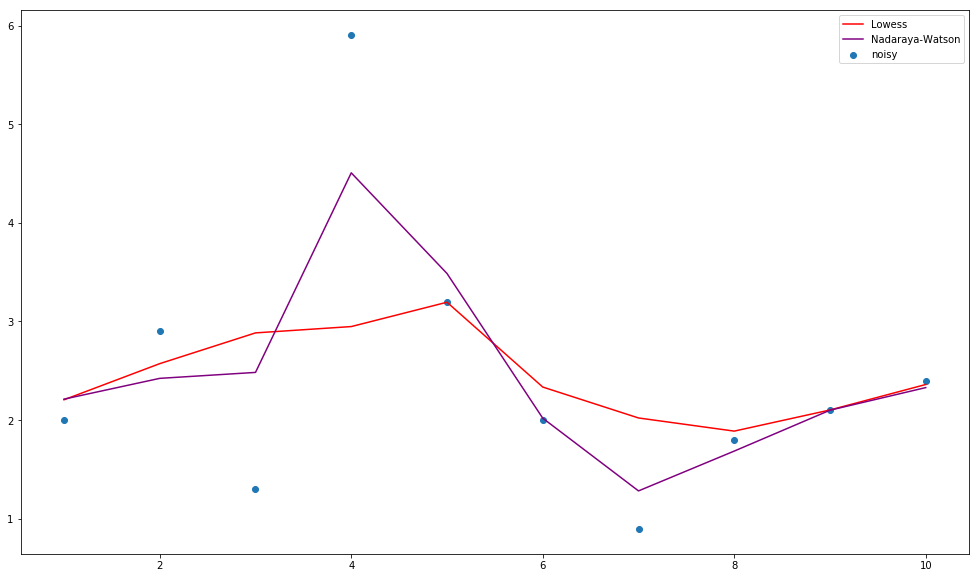

In [7]:
# LOWESS part_1

plt.figure(figsize=(com.W_inch, com.H_inch))
plt.scatter(X, y, label='noisy')

yest = lowess(X, y, f=0.41, iter=3) # f принадлежит промежутку (0,1)
plt.plot(X, yest, label='Lowess', color='red')

nw_model = NadarayaWatson(h=1.5, kerne=gen.kernel.quartic)
y_pred = nw_model.predict(X=X, y=y, X_test=X)
plt.plot(X, y_pred, label='Nadaraya-Watson', color="purple")

plt.legend()
plt.show()

## Линейная регрессия

Дана модель $g ( x , \alpha ) = \sum _ { j = 1 } ^ { n } \alpha _ { j } f _ { j } ( x ) $ , где $\alpha \in \mathbb { R } ^ { n }$.

$Q ( \alpha ) = \| F \alpha - y \| ^ { 2 }$

$\frac { \partial Q } { \partial \alpha } ( \alpha ) = 2 F ^ { \mathrm { T } } ( F \alpha - y ) = 0$

$F ^ { \mathrm { T } } F \alpha = F ^ { \mathrm { r } } y$

$F ^ { \mathrm { r } } F$ - ковариационная матрица признаков $\left( f _ { 1 } ( x ) , \ldots , f _ { n } ( x ) \right)$

Решение системы: $\alpha ^ { * } = \left( F ^ { \mathrm { r } } F \right) ^ { - 1 } F ^ { \mathrm { T } } y = F ^ { + } y$

$Q \left( \alpha ^ { * } \right) = \left\| P _ { F } y - y \right\| ^ { 2 }$, где $P _ { F } = F F ^ { + } = F \left( F ^ { \mathrm { r } } F \right) ^ { - 1 } F ^ { \mathrm { T } } -$ проекционная матрица

$$F = V D U ^ { \mathrm { T } }$$


$F ^ { + } = \left( U D V  ^ { \mathrm { T } } V D U ^ { \mathrm { T } } \right) ^ { - 1 } U D V ^ { \mathrm { T } } = U D ^ { - 1 } V ^ { \mathrm { T } } = \sum _ { j = 1 } ^ { n } \frac { 1 } { \sqrt { \lambda _ { j } } } u _ { j } v _ { j }  ^ { \mathrm { T } }$

$\alpha ^ { * } = F ^ { + } y = U D ^ { - 1 } V ^ { \mathrm { T } } y = \sum _ { j = 1 } ^ { n } \frac { 1 } { \sqrt { \lambda _ { j } } } u _ { j } \left( v _ { j } ^ { \mathrm { T } } y \right)$

$F \alpha ^ { * } = P _ { F } y = \left( V D U ^ { \mathrm { T } } \right) U D ^ { - 1 } V ^ { \mathrm { T } } y =V V ^ { \mathrm { T } } y = \sum _ { j = 1 } ^ { n } v _ { j } \left( v _ { j } ^ { \mathrm { T } } y \right)$

$\left\| \alpha ^ { * } \right\| ^ { 2 } = y ^ { \mathrm { T } } V D ^ { - 1 } U ^ { T } U D ^ { - 1 } V ^ { \mathrm { T } } y =y ^ { \mathrm { T } } V D ^ { - 2 } V ^ { \mathrm { T } } y = \sum _ { j = 1 } ^ { n } \frac { 1 } { \lambda _ { j } } \left( v _ { j } ^ { \mathrm { T } } y \right) ^ { 2 }$

All 13 features:  {'CRIM': -0.035196009824904326, 'ZN': 0.08556158592408385, 'INDUS': 0.062400796995306436, 'CHAS': 4.846374457486992, 'NOX': 0.44303932644722477, 'RM': 4.533411920115072, 'AGE': 0.027240891316655802, 'DIS': -0.45652655738404524, 'RAD': 0.2681298647152176, 'TAX': -0.01347166538297499, 'PTRATIO': -0.3064712783825228, 'B': 0.0207227792536283, 'LSTAT': -0.5461692447228698} 

Selected 2 features:  {'B': 0.07246072447454237, 'LSTAT': -0.3720986298003147} 

SSE OLS with all features: 1100.763
SSE OLS+SVD with 2 features: 3206.159


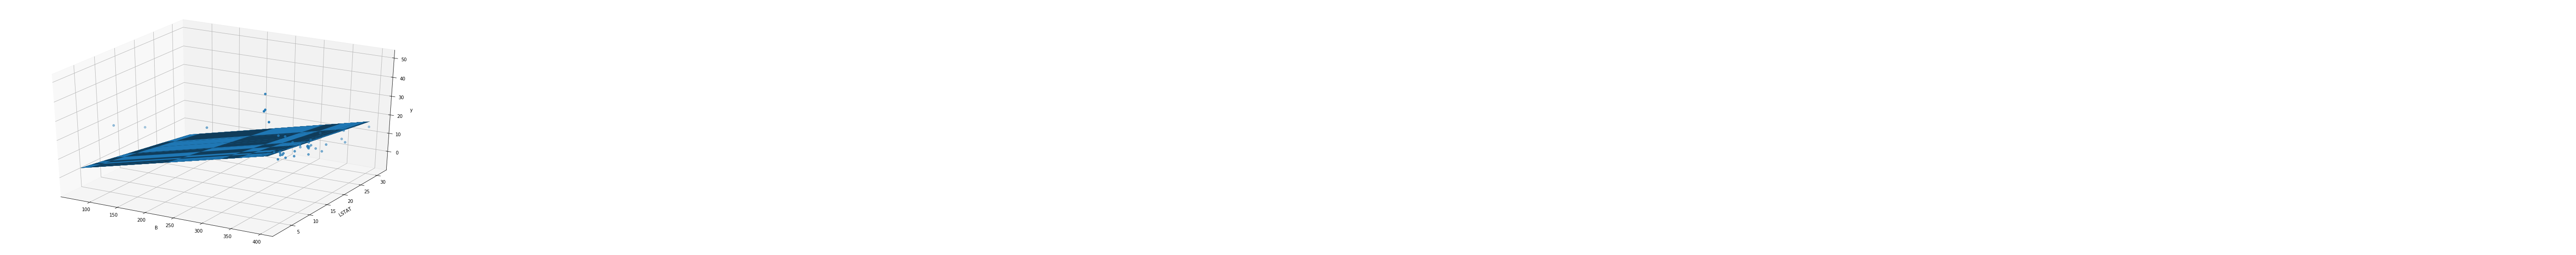

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_train, y_train, x_test, y_test = FormData.prep_data(data="boston", train_size=.25, shuffle=True,
                                                      use_control_sample=True, test_size=0.1)

features = [11, 12]  # 0,1,2 / # 4,5,7,12
k = x_train.keys().size

X_train_cuted = x_train.iloc[:, features]
X_test_cuted = x_test.iloc[:, features]

lin_regr_casual = LinearRegr()
lin_regr_svd = LinearRegr()

lin_regr_casual.fit(X=x_train, y=y_train, mode="casual")
lin_regr_svd.fit(X=X_train_cuted, y=y_train, mode="svd", k=k)

alpha_dict_casual = dict(zip(x_train.keys(), lin_regr_casual.alfa))
print('All %d features: ' % (x_train.keys().size), alpha_dict_casual, '\r\n')

y_pred_casual_full = lin_regr_casual.predict(X=x_test)

alpha1 = lin_regr_svd.alfa[0]
alpha2 = lin_regr_svd.alfa[1]

alpha_dict_svd = dict(zip(X_train_cuted.keys(), lin_regr_svd.alfa))
print('Selected %d features: ' % (features.__len__()), alpha_dict_svd, '\r\n')

y_pred_svd_cuted = lin_regr_svd.predict(X=X_test_cuted)

print('SSE OLS with all features: %.3f' % sse(y_test, y_pred_casual_full))
print('SSE OLS+SVD with 2 features: %.3f' % sse(y_test, y_pred_svd_cuted))

fig = plt.figure(figsize=(com.W_inch, com.H_inch))
ax = fig.add_subplot(111, projection='3d')
f1 = np.array(X_test_cuted.iloc[:, 0])
f2 = np.array(X_test_cuted.iloc[:, 1])
X, Y = np.meshgrid(f1, f2)
zs = np.array([fun2(f1, f2, alpha1, alpha2) for f1, f2 in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)
ax.set_xlabel(x_train.keys()[features[0]])
ax.set_ylabel(x_train.keys()[features[1]])
ax.set_zlabel('y')
ax.scatter(f1, f2, y_test)

# plt.savefig("images/linear_regression_svd_k=" + str(k) + ".png")
plt.show()


## Гребневая регрессия

$Q _ { \tau } ( \alpha ) = \| F \alpha - y \| ^ { 2 } + \tau \| \alpha \| ^ { 2 }$, где $\tau = \frac {1} {\sigma} > 0$

Априорное распределение вектора $\alpha -$ гауссовское с ковариационной матрицей $\sigma I_n$, а $\tau I_n -$ гребень.

$$\alpha _ { \tau } ^ { * } = \left( F ^ { \mathrm { T } }  F + \tau I _ { n } \right) ^ { - 1 } F ^ { \mathrm { T } }  y$$

Rem.: вычислив SVD 1 раз, можно подобрать $\tau$.

$\alpha _ { \tau } ^ { * } = \left( U D ^ { 2 } U ^ { \mathrm { T } } + \tau I _ { n } \right) ^ { - 1 } U D V ^ { \mathrm { T } } y= U \left( D ^ { 2 } + \tau I _ { n } \right) ^ { - 1 } D V ^ { \mathrm { T } } y =$

$F \alpha _ { \tau } ^ { * } = V D U ^ { \mathrm { T } } \alpha _ { \tau } ^ { * } =V \operatorname { diag } \left( \frac { \lambda _ { j } } { \lambda _ { j } + \tau } \right) V ^ { T } y =\sum _ { j = 1 } ^ { n } \frac { \lambda _ { j } } { \lambda _ { j } + \tau } v _ { j } \left( v _ { j } ^ { \mathrm { T } } y \right)$

$\left\| \alpha _ { \tau } ^ { * } \right\| ^ { 2 } = \left\| D ^ { 2 } \left( D ^ { 2 } + \tau I _ { n } \right) ^ { - 1 } D ^ { - 1 } V ^ { \mathrm { T } } y \right\| ^ { 2 } = \sum _ { j = 1 } ^ { n } \frac { 1 } { \lambda _ { j } + \tau } \left( v _ { j } ^ { \mathrm { T } } y \right) ^ { 2 } < \sum _ { j = 1 } ^ { n } \frac { 1 } { \lambda _ { j } } \left( v _ { j } ^ { \mathrm { T } } y \right) ^ { 2 } = \left\| \alpha ^ { * } \right\| ^ { 2 }$

$$F \alpha^{*}_{\tau} \neq F\alpha$$



           before      after
CRIM    -0.090920  -0.014135
ZN       0.042304   0.010885
INDUS   -0.036348  -0.358857
CHAS     3.053042  41.280163
NOX     -4.450347   1.566048
RM       6.086586   4.876571
AGE     -0.013261  -0.066778
DIS     -1.074760  -0.875902
RAD      0.149239  -0.125216
TAX     -0.009051   0.005975
PTRATIO -0.339344  -0.024442
B        0.013742   0.007027
LSTAT   -0.374378  -0.263407 

SSE (before Ridge): 2606.852;	 ||svd_alpha*||: 67.618;	 svd_Q: 9680.287
SSE (after Ridge): 15732.704;	 ||ridge_alpha*||: 40.031;	 ridge_Q: 41942.565


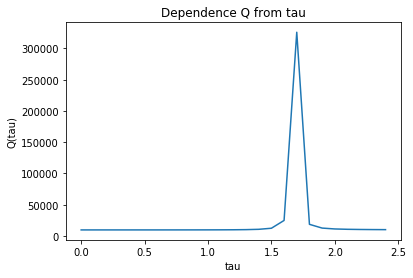

In [9]:
x_train, y_train, x_test, y_test = FormData.prep_data(data="boston", train_size=0.75, test_size=1., shuffle=True,
                                                      use_control_sample=True)

k = x_train.keys().size

linreg_svd = LinearRegr()
linreg_svd.fit(X=x_train, y=y_train, mode="svd", k=k)
y_pred_linsvd = linreg_svd.predict(x_test)

ridgereg = RidgeRegr()
ridgereg.fit(X=x_train, y=y_train, k=k, alpha=20.4)
y_pred_ridge = ridgereg.predict(x_test)

depTau = ridgereg.depTauQ(X=x_train, y=y_train, k=k, l=0., r=2.5)
plt.plot(depTau['tau'], depTau['Q'])
plt.title('Dependence Q from tau')
plt.xlabel('tau')
plt.ylabel('Q(tau)')
plt.savefig("images/depQfromTau.png")
# plt.show()

table = pd.DataFrame(index=x_train.keys(), data={'before': linreg_svd.alfa, 'after': ridgereg.alpha})
print(table, '\r\n')

print("SSE (before Ridge): %.3f" % sse(y_pred_linsvd, y_test) +
      ";\t ||svd_alpha*||: %.3f" % linreg_svd.alfa_norm +
      ";\t svd_Q: %.3f" % linreg_svd.Q)

print("SSE (after Ridge): %.3f" % sse(y_pred_ridge, y_test) +
  ";\t ||ridge_alpha*||: %.3f" % ridgereg.alpha_norm +
  ";\t ridge_Q: %.3f" % ridgereg.Qconst)

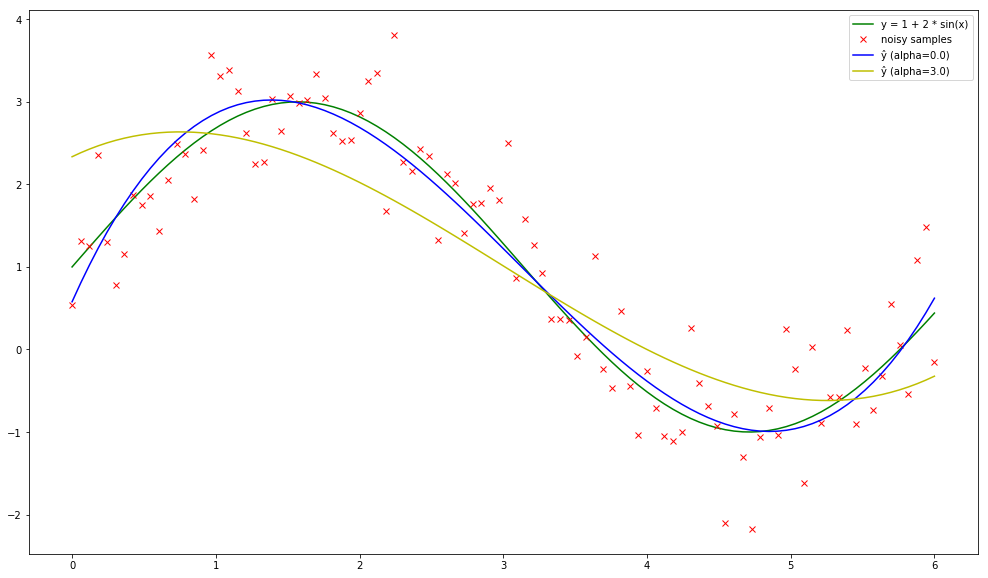

In [10]:
# Create synthetic data
X = np.linspace(0, 6, 100)
y = 1 + 2 * np.sin(X)
yhat = y + .5 * np.random.normal(size=len(X))

# Plot synthetic data
plt.figure(figsize=(com.W_inch, com.H_inch))
plt.plot(X, y, 'g', label='y = 1 + 2 * sin(x)')
plt.plot(X, yhat, 'rx', label='noisy samples')

# Create feature matrix
tX = np.array([X]).T
tX = np.hstack((tX, np.power(tX, 2), np.power(tX, 3)))

# Plot regressors
r = RidgeRegressor()
r.fit(tX, y)
plt.plot(X, r.predict(tX), 'b', label=u'ŷ (alpha=0.0)')
alpha = 3.0
r.fit(tX, y, alpha)
plt.plot(X, r.predict(tX), 'y', label=u'ŷ (alpha=%.1f)' % alpha)

plt.legend()
plt.show()

## Метод LASSO

$$\left\{ \begin{array} { l } { Q ( \alpha ) = \| F \alpha - y \| ^ { 2 } \rightarrow \min } \\ { \sum _ { j = 1 } ^ { n } \left| \alpha _ { j } \right| \leqslant \kappa } \end{array} \right.$$

$\alpha _ { j } = \alpha _ { j } ^ { + } - \alpha _ { j } ^ { - }$

$|\alpha _ { j }| = \alpha _ { j } ^ { + } + \alpha _ { j } ^ { - }$

$\sum _ { j = 1 } ^ { n } \alpha _ { j } ^ { + } + \alpha _ { j } ^ { - } \leqslant \kappa ; \quad \alpha _ { j } ^ { + } \geqslant 0 ; \quad \alpha _ { j } ^ { - } \geqslant 0$

Чем меньше $\kappa$, тем больше $j: \alpha _ { j } ^ { + } + \alpha _ { j } ^ { - }=0$

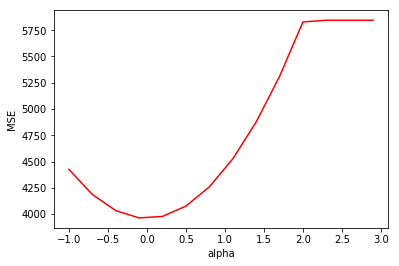

<Figure size 432x288 with 0 Axes>

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from prepare_data import FormData
from sklearn.model_selection import cross_val_score

X, y, _, _ = FormData.prep_data(data="diabetes")
X = X.values
y = y.values

res = []
for alpha in np.arange(-1., 3., 0.3):
    model = Lasso(alpha=alpha, max_iter=1000)
    model.fit(X, y)
    y_pred = model.predict(X)

    # print('Coefficients: \n', model.coef_)
    res.append(list([alpha, mean_squared_error(y, y_pred)]))

res2 = pd.DataFrame(res, columns=['alpha', 'MSE'])

plt.plot(res2['alpha'].values, res2['MSE'].values, label='LASSO', color='red')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()
plt.savefig('images/lasso.png')

## Метод главных компонент

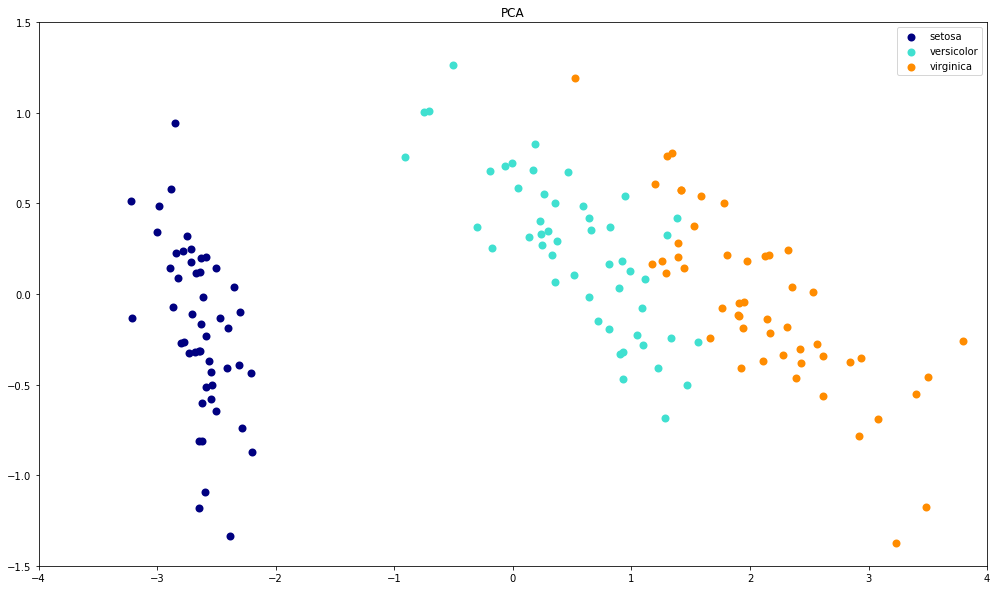

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2

pca = PCA(n_components)
pca.fit(X)
X_pca = pca.compress(X)

colors = ['navy', 'turquoise', 'darkorange']

plt.figure(figsize=(com.W_inch, com.H_inch))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, lw=2, label=target_name)
    plt.title('PCA')


plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-4, 4, -1.5, 1.5])

plt.show()